# Logistic regression and MNIST dataset

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import torchvision
from torch.autograd import Variable
from matplotlib import pyplot as plt
import random


In [2]:
# parameters
inputs, hiddens, outputs = 784, 200, 10
learning_rate = 0.01
epochs = 50
batch_size = 20

#compose several transformations together 
#image to tensor, normalization for the given channels (mean = 0.13, std = 0.3)
transformation = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))])
#dataset for training (download = True to download the dataset for the first time)
train_dataset = datasets.MNIST('mnist/',train=True,transform=transformation, download=False)
#loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
#dataset for testing (download = True to download the dataset for the first time)
test_dataset = datasets.MNIST('mnist/',train=False,transform=transformation, download=False)
#loader
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


In [3]:
#the train dataset is comprised by 60000 images
print (len(train_dataset))
#its loader posseses batches of 20 images
print (len(train_loader))


60000
3000


#### **_Note_**:  train_dataset has a transformation applied. Originally, every element is a tuple of a PIL image and its numeric label.

3
torch.Size([1, 28, 28])
0
torch.Size([])


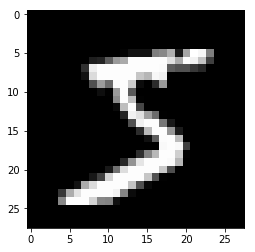

tensor(5)


In [4]:
#every element of train_dataset is a tuple conformed by a tensor (the image) and its label
print(train_dataset[0][0].dim()) #image
print(train_dataset[0][0].size())
print(train_dataset[0][1].dim()) #label (the corresponding number)
print(train_dataset[0][1].size())

plt.imshow(train_dataset[0][0][0], cmap = 'gray' )
plt.show()

print(train_dataset[0][1])

#### Reshaping an element of train_dataset

In [6]:
img = train_dataset[0][0]
#making img into a 1d tensor
reshaped_img = img.view(-1, inputs)     #-1 infers the correct size given the other dimensions (inputs)
print(reshaped_img.size())
print(reshaped_img.dim())


torch.Size([1, 784])
2


#### Inspecting a DataLoader

In [7]:
batches = list(train_loader)

In [8]:
#every batch has 20 images and 20 labels
batch = batches[0]
print( batch[0].size() )
print( batch[1].size() )

torch.Size([20, 1, 28, 28])
torch.Size([20])


### Multi Layer Perceptron

In [9]:

class mlp(nn.Module):
    def __init__(self):
        super(mlp, self).__init__()
        self.sigmoid = nn.Sigmoid()
        self.hidden_layer = nn.Linear(inputs, hiddens)
        self.output_layer = nn.Linear(hiddens, outputs)

    def forward(self, x):
        out = self.sigmoid(self.hidden_layer(x))
        out = self.sigmoid(self.output_layer(out))
        return out

    def name(self):
        return "mlp"

def train():
    model = mlp()
    loss = nn.MSELoss(size_average=False)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    for epoch in range(epochs):
        avg_error = 0
        #for every image in train_loader
        for i, (images, labels) in enumerate(train_loader):
            
            images = Variable(images.view(-1, inputs))
            # Convert class label to one hot vector 
            one_hot = torch.FloatTensor(labels.size(0), 10).zero_()
            target = one_hot.scatter_(1, labels.view((labels.size(0),1)), 1)            
            target = Variable(target)
            # Compute loss and gradient
            optimizer.zero_grad()
            out = model(images)
            error = loss(out, target)
            error.backward()
            # Apply gradient
            optimizer.step()
            avg_error += error.data[0]
        # Average cost for epoch (over all training dataset samples)
        avg_error /= train_loader.dataset.train_data.shape[0]
        #print ("Epoch [%d/%d], error: %.4f" %(epoch+1, epochs, avg_error))
    # Save model to file
    torch.save(model.state_dict(), 'model.pkl')

def predict_all():
    model = mlp()
    model.load_state_dict(torch.load('model.pkl'))
    correct, total = 0, 0
    for images, labels in test_loader:
        images = Variable(images.view(-1, inputs))
        out = model(images)
        _, predicted = torch.max(out.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()
    print('accuracy: %0.2f %%' % (100.0 * correct / total))   


### Training and saving the model!

In [ ]:
train()

### Loading a model and classifying an image from the test_dataset

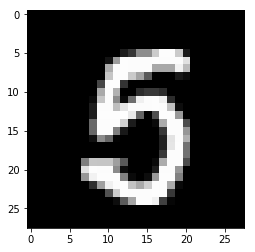

my prediction is 5 and the actual digit was 5 


In [10]:
model = mlp()
model.load_state_dict(torch.load('model.pkl'))

i = random.randint(0,10000)
img = test_dataset[i][0]
reshaped_img = img.view(-1, inputs)
out = model(reshaped_img)
_,predicted = torch.max(out,1)

plt.imshow(img[0], cmap = 'gray' )
plt.show()

print("my prediction is {} and the actual digit was {} ".format(predicted[0], test_dataset[i][1]))

